# Thrust and RPM

### Parse the data for the thrust and RPM

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math
import os
from array import *

In [68]:
data = pd.read_csv('raw_data/IMO9371361_201810_hcx_port_mp.csv', header=0, sep=";")

In [69]:
print(list(data.columns.values))

['uid', 'time_in_ms', 'AzimuthFeedback', 'AzimuthOrder', 'LoadFeedback', 'PositionInCommand', 'RPMFeedback', 'RPMOrder', 'Running', 'PT31', 'PT32', 'PT33', 'WD31', 'SystemMode', 'Ship_speed', 'Power_mode_RPM_Mode', 'Maneuver_Transit_mode', 'Level_order', 'TS31', 'TS32', 'PS31', 'DPA1', 'DPA2', 'LS31_Low', 'LS31_High', 'LS32_Low', 'LS32_High', 'LS34_Low', 'LS34_High', 'LS33_High']


In [70]:
display(data.head())

,uid,time_in_ms,AzimuthFeedback,AzimuthOrder,LoadFeedback,PositionInCommand,RPMFeedback,RPMOrder,Running,PT31,...,PS31,DPA1,DPA2,LS31_Low,LS31_High,LS32_Low,LS32_High,LS34_Low,LS34_High,LS33_High
0,105997990,1538352000409,-0.200054,-0.687561,0.016582,5.0,0.100125,0.0,0,0.461219,...,1,1,1,1,1,1,1,1,1,0
1,105997991,1538352001409,-0.200054,-0.912415,-0.016582,5.0,0.108469,0.0,0,0.454998,...,1,1,1,1,1,1,1,1,1,0
2,105997992,1538352002409,-0.400108,0.213345,0.053890,5.0,0.108469,0.0,0,0.456657,...,1,1,1,1,1,1,1,1,1,0
3,105997993,1538352003409,-0.200054,0.213345,0.016582,5.0,0.116813,0.0,0,0.455827,...,1,1,1,1,1,1,1,1,1,0
4,105997994,1538352004408,-0.200054,0.213345,-0.037309,5.0,0.100125,0.0,0,0.457694,...,1,1,1,1,1,1,1,1,1,0


In [71]:
display(data[data["Running"].isnull()])

,uid,time_in_ms,AzimuthFeedback,AzimuthOrder,LoadFeedback,PositionInCommand,RPMFeedback,RPMOrder,Running,PT31,...,PS31,DPA1,DPA2,LS31_Low,LS31_High,LS32_Low,LS32_High,LS34_Low,LS34_High,LS33_High


In [72]:
df = pd.DataFrame(data)

In [73]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944478 entries, 0 to 1944477
Data columns (total 30 columns):
uid                      int64
time_in_ms               int64
AzimuthFeedback          float64
AzimuthOrder             float64
LoadFeedback             float64
PositionInCommand        float64
RPMFeedback              float64
RPMOrder                 float64
Running                  int64
PT31                     float64
PT32                     float64
PT33                     float64
WD31                     float64
SystemMode               float64
Ship_speed               float64
Power_mode_RPM_Mode      float64
Maneuver_Transit_mode    float64
Level_order              float64
TS31                     float64
TS32                     float64
PS31                     int64
DPA1                     int64
DPA2                     int64
LS31_Low                 int64
LS31_High                int64
LS32_Low                 int64
LS32_High                int64
LS34_Low        

None

In [74]:
display(df[df["Running"] != 0].head())

,uid,time_in_ms,AzimuthFeedback,AzimuthOrder,LoadFeedback,PositionInCommand,RPMFeedback,RPMOrder,Running,PT31,...,PS31,DPA1,DPA2,LS31_Low,LS31_High,LS32_Low,LS32_High,LS34_Low,LS34_High,LS33_High
23507,106021497,1538375507408,-0.100025,-0.687561,-0.070472,5.0,0.075094,0.0,1,1.104314,...,1,1,1,1,1,1,1,1,1,0
23508,106021498,1538375508409,-0.200054,0.439816,-0.091199,5.0,0.075094,0.0,1,1.313770,...,1,1,1,1,1,1,1,1,1,0
23509,106021499,1538375509409,0.000000,0.439816,-0.053890,5.0,0.066750,0.0,1,1.391539,...,1,1,1,1,1,1,1,1,1,0
23510,106021500,1538375510409,0.000000,-0.687561,-0.053890,5.0,0.058406,0.0,1,1.409166,...,1,1,1,1,1,1,1,1,1,0
23511,106021501,1538375511408,-0.300083,-0.687561,0.000000,5.0,0.058406,0.0,1,1.420572,...,1,1,1,1,1,1,1,1,1,0


In [75]:
data1 = pd.read_csv('raw_data/IMO9371361_201810_drive_ps.csv', header=0, sep=";")

In [76]:
print(list(data.columns.values))

['uid', 'time_in_ms', 'AzimuthFeedback', 'AzimuthOrder', 'LoadFeedback', 'PositionInCommand', 'RPMFeedback', 'RPMOrder', 'Running', 'PT31', 'PT32', 'PT33', 'WD31', 'SystemMode', 'Ship_speed', 'Power_mode_RPM_Mode', 'Maneuver_Transit_mode', 'Level_order', 'TS31', 'TS32', 'PS31', 'DPA1', 'DPA2', 'LS31_Low', 'LS31_High', 'LS32_Low', 'LS32_High', 'LS34_Low', 'LS34_High', 'LS33_High']


In [77]:
display(data.head())

,uid,time_in_ms,AzimuthFeedback,AzimuthOrder,LoadFeedback,PositionInCommand,RPMFeedback,RPMOrder,Running,PT31,...,PS31,DPA1,DPA2,LS31_Low,LS31_High,LS32_Low,LS32_High,LS34_Low,LS34_High,LS33_High
0,105997990,1538352000409,-0.200054,-0.687561,0.016582,5.0,0.100125,0.0,0,0.461219,...,1,1,1,1,1,1,1,1,1,0
1,105997991,1538352001409,-0.200054,-0.912415,-0.016582,5.0,0.108469,0.0,0,0.454998,...,1,1,1,1,1,1,1,1,1,0
2,105997992,1538352002409,-0.400108,0.213345,0.053890,5.0,0.108469,0.0,0,0.456657,...,1,1,1,1,1,1,1,1,1,0
3,105997993,1538352003409,-0.200054,0.213345,0.016582,5.0,0.116813,0.0,0,0.455827,...,1,1,1,1,1,1,1,1,1,0
4,105997994,1538352004408,-0.200054,0.213345,-0.037309,5.0,0.100125,0.0,0,0.457694,...,1,1,1,1,1,1,1,1,1,0


In [78]:
df2 = pd.DataFrame(data)

In [79]:
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944478 entries, 0 to 1944477
Data columns (total 30 columns):
uid                      int64
time_in_ms               int64
AzimuthFeedback          float64
AzimuthOrder             float64
LoadFeedback             float64
PositionInCommand        float64
RPMFeedback              float64
RPMOrder                 float64
Running                  int64
PT31                     float64
PT32                     float64
PT33                     float64
WD31                     float64
SystemMode               float64
Ship_speed               float64
Power_mode_RPM_Mode      float64
Maneuver_Transit_mode    float64
Level_order              float64
TS31                     float64
TS32                     float64
PS31                     int64
DPA1                     int64
DPA2                     int64
LS31_Low                 int64
LS31_High                int64
LS32_Low                 int64
LS32_High                int64
LS34_Low        

None

In [80]:
#display(df2[df2["Running"] != 0].head())

### AzimuthOrder in degrees and RPMOrder in % of 203 rpm 

In [81]:
# Create a latitude and longitude location
rot = pd.DataFrame({
    "time_in_ms": df2["time_in_ms"].values,
    "RPMOrder": df2["RPMOrder"].values,
    "AzimuthOrder": df2["AzimuthOrder"].values
})

In [82]:
display(rot.head())

,time_in_ms,RPMOrder,AzimuthOrder
0,1538352000409,0.0,-0.687561
1,1538352001409,0.0,-0.912415
2,1538352002409,0.0,0.213345
3,1538352003409,0.0,0.213345
4,1538352004408,0.0,0.213345


In [83]:
rot.to_csv('output_data/ThrustData.csv', sep=";")

In [84]:
# definitions for the axes
left, width = 0.1, 0.9
bottom, height =  0.1, 0.65

rect_scatter = [left, bottom, width, height]

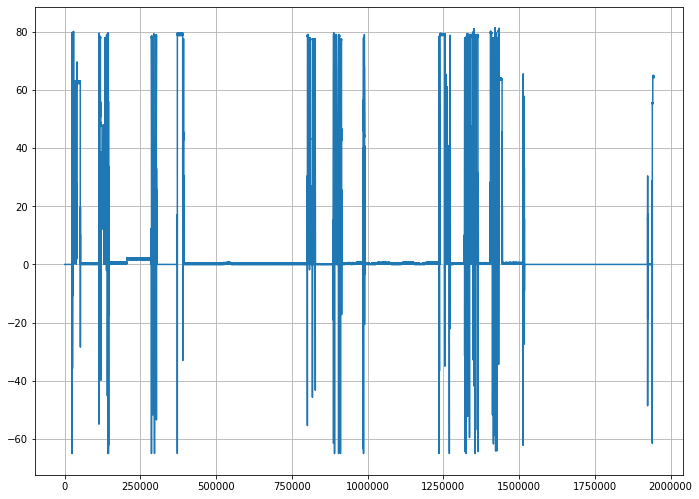

In [85]:
# start with a rectangular Figure
fig = plt.figure(1, figsize=(10,10))
axScatter = plt.axes(rect_scatter)

# the scatter plot:
axScatter.plot(rot.RPMOrder)
axScatter.grid()
plt.show()

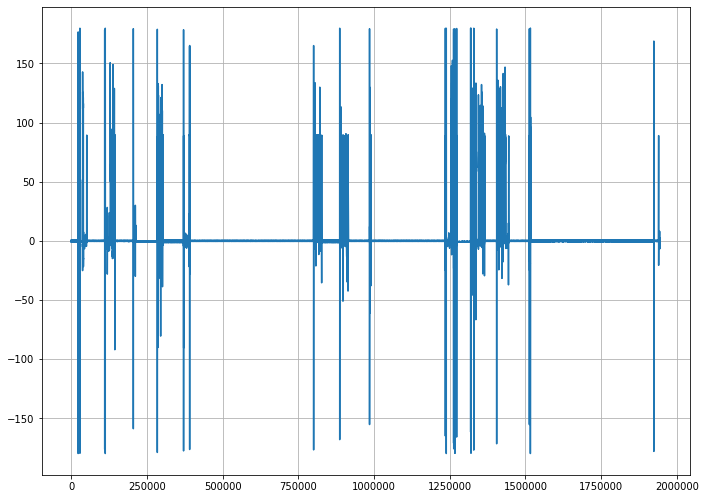

In [86]:
# start with a rectangular Figure
fig2 = plt.figure(1, figsize=(10,10))
axScatter = plt.axes(rect_scatter)

# the scatter plot:
axScatter.plot(rot.AzimuthOrder)
axScatter.grid()
plt.show()